# Relatório de Análise VII

## Criando Agrupamentos

In [31]:
import pandas as pd

In [32]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [33]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Apartamento
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [34]:
#Faz a media de uma coluna
dados['Valor'].mean()

5046.172821405663

In [35]:
bairros = ['Barra da Tijuca', 'Copacaban', 'Ipanema', 'Leblon','Botafogo','Flamengo','Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [36]:
dados['Bairro'].drop_duplicates()

5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [37]:
grupo_bairro = dados.groupby('Bairro')

In [38]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [39]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [40]:
#Forma simplificada de aplicar a media por grupos

grupo_bairro[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatisticas Descritivas

In [41]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [48]:
grupo_bairro['Valor'].aggregate(['min', 'max','sum']).rename(columns = {'min':'Minimo','max':'Máximo','sum':'Soma'})

,Minimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [49]:
#Importando o MATPLOTLIB

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

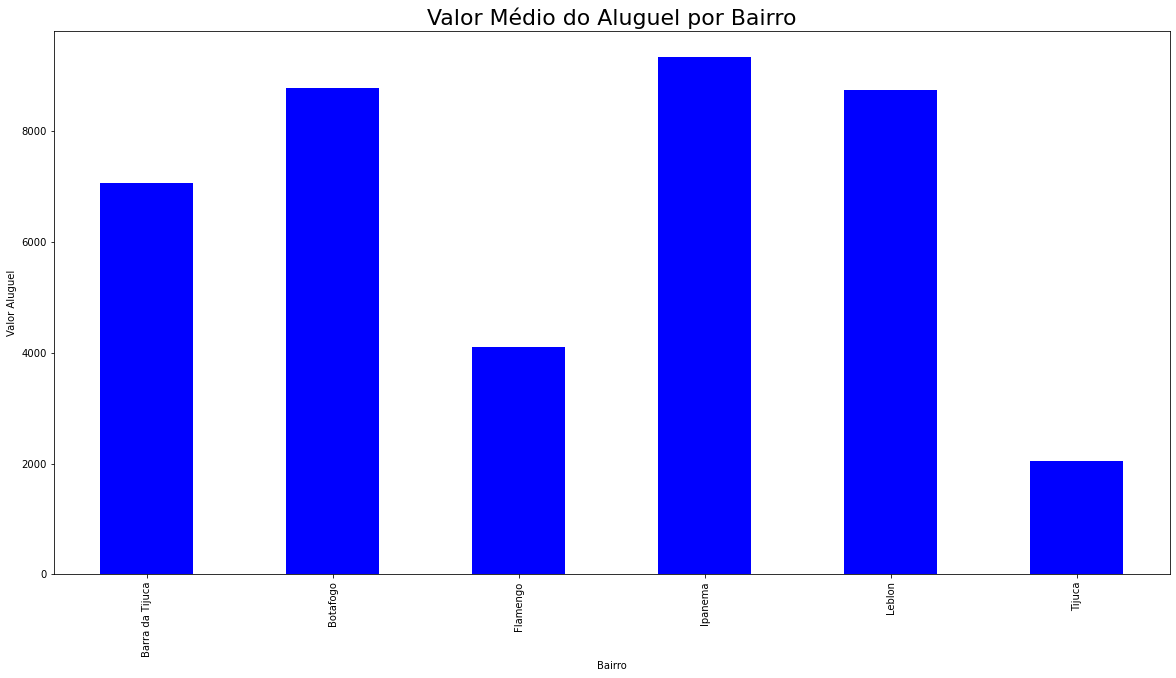

In [52]:
#Grafico de média
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

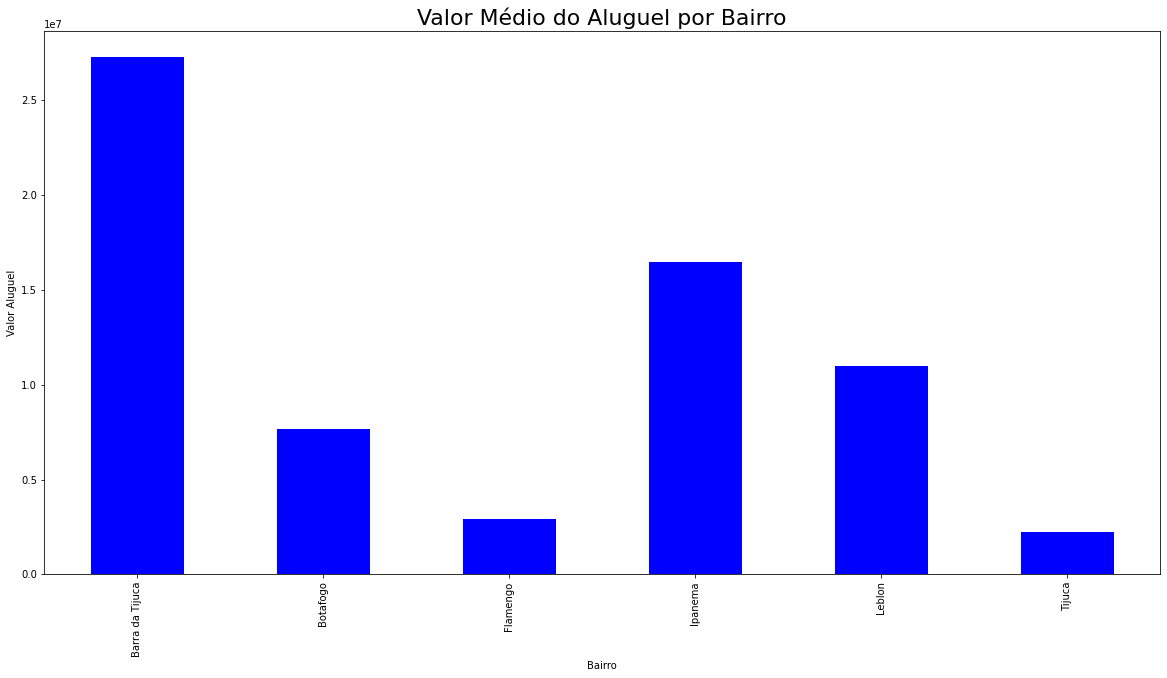

In [53]:
#Grafico de soma
fig = grupo_bairro['Valor'].sum().plot.bar(color = 'blue')
fig.set_ylabel('Valor Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Condominio')

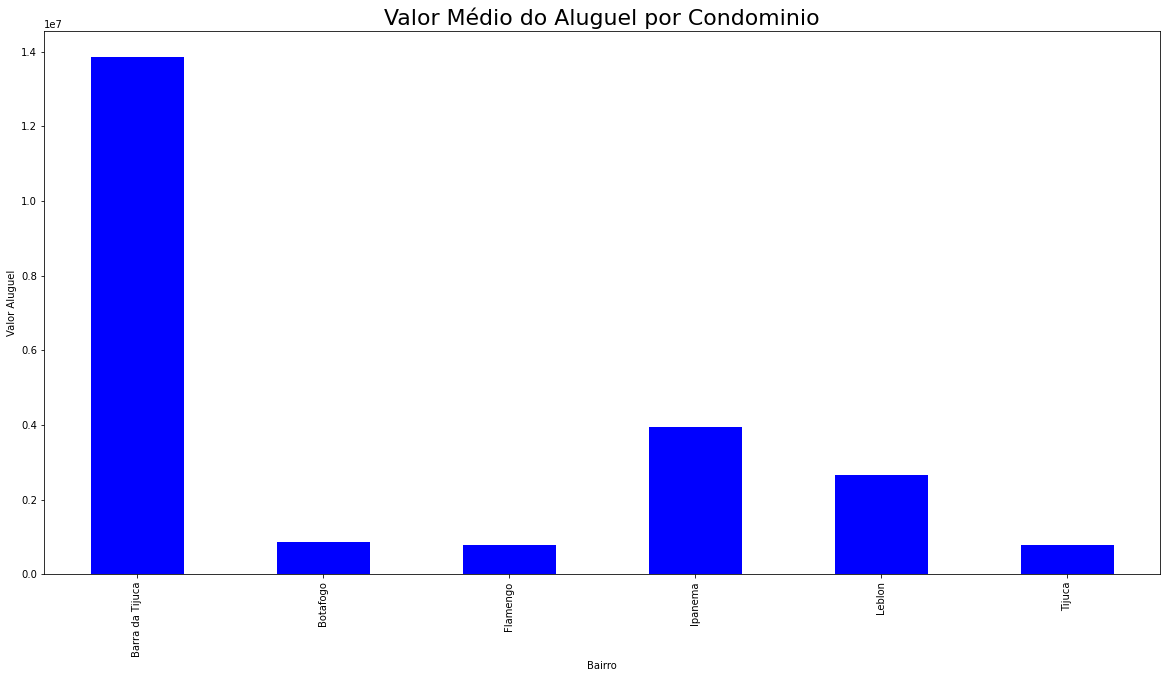

In [55]:
#Grafico de soma
fig = grupo_bairro['Condominio'].sum().plot.bar(color = 'blue')
fig.set_ylabel('Valor Aluguel')
fig.set_title('Valor Médio do Aluguel por Condominio', {'fontsize':22})